In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.stats import linregress

In [ ]:
from statsmodels.stats.power import FTestPower
r2 = 0.9
f2 = r2 / (1 - r2)
f = np.sqrt(f2)
r2, f2, f
df1 = 50
df2 = FTestPower().solve_power(effect_size=f, alpha=0.05, power=0.9,
                                   df_denom=df1)
ncc = 1  # default
nobs = df2 + df1 + ncc
df2, nobs

FTestPower().power(effect_size=f, alpha=0.1, df_denom=df1, df_num=df2)

In [2]:
# Mt. Sinai data location
file_dir = '/data/Ali/RadDBS-QSM/src/csv'

In [3]:
# Load patient data
os.chdir(file_dir)
df = pd.read_csv('QSM anonymus- 6.22.2023-1528.csv')

In [4]:
# Display original dataframe
df

,Unnamed: 0,PRE-OP,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,POST-OP (6 MONTHS),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [5]:
# Make a copy
dfd = df.copy()

In [6]:
# Drop blank columns
for (columnName, columnData) in dfd.iteritems():
    if columnData.isnull().all():
        print('Dropping NaN column at',columnName)
        dfd.drop(columnName,axis=1,inplace=True)

In [7]:
# Add relevant column names from headers
for (columnName, columnData) in dfd.iteritems():
        dfd.rename(columns={columnName:columnName+': '+columnData.values[0]},inplace=True)
        

In [8]:
def drop_prefix(self, prefix):
    self.columns = self.columns.str.lstrip(prefix)
    return self

pd.core.frame.DataFrame.drop_prefix = drop_prefix

In [9]:
dfd.drop_prefix('Unnamed:')

,0: CORNELL ID,PRE-OP: Apathy Off (pre-dbs),2: Apathy ON (pre-dbs),3: OFF (pre-dbs updrs),4: ON (pre-dbs updrs),5: mri (pre-op),6: pre op levadopa equivalent dose (mg),POST-OP (6 MONTHS): 6 mo levadopa equivalent dose (mg),8: OFF meds ON stim 6mo,9: ON meds ON stim 6mo,10: off stim on med 6mo,11: off stim off med 6mo,12: apathy off 6mo,13: apathy on 6 mo
0,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [10]:
for (columnName, columnData) in dfd.iteritems():
    if columnName[1].isdigit():
        dfd.rename(columns={columnName:columnName[4:]},inplace=True)

In [11]:
dfd

,CORNELL ID,PRE-OP: Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),POST-OP (6 MONTHS): 6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
0,CORNELL ID,Apathy Off (pre-dbs),Apathy ON (pre-dbs),OFF (pre-dbs updrs),ON (pre-dbs updrs),mri (pre-op),pre op levadopa equivalent dose (mg),6 mo levadopa equivalent dose (mg),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo,apathy off 6mo,apathy on 6 mo
1,67,na,13,60,41,3/9/2020,500,500,31,29,NaN,NaN,na,na
2,only Ct data,na,na,43,12,na,2304,819,na,20,18,NaN,na,na
3,74,na,na,34,11,2/10/2020,1200,600,na,17,na,NaN,na,na
4,84,na,22,53,13,6/1/2020,350,150,na,34,na,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,52,NaN,NaN,58,27,NaN,1804,1804,19,12,NaN,NaN,NaN,NaN
88,53,NaN,NaN,77,47,NaN,575,250,NaN,19,26,NaN,NaN,NaN
89,54,NaN,NaN,63,36,NaN,1400,400,8,NaN,NaN,NaN,NaN,NaN
90,55,NaN,NaN,40,29,NaN,400,450,NaN,13,NaN,37,NaN,NaN


In [12]:
# Make a copy for motor symptoms
motor_df = dfd.copy()
# Drop non-motor (III) columns
for (columnName, columnData) in motor_df.iteritems():
    if 'pre-dbs updrs' in columnName:
        next
    elif 'stim' in columnName:
        next
    elif 'CORNELL ID' in columnName:
        next
    else:
        motor_df.drop(columnName,axis=1,inplace=True)

In [13]:
# Drop subheader
motor_df = motor_df.tail(-1)
motor_df = motor_df.replace('na',np.nan)

In [14]:
motor_df

,CORNELL ID,OFF (pre-dbs updrs),ON (pre-dbs updrs),OFF meds ON stim 6mo,ON meds ON stim 6mo,off stim on med 6mo,off stim off med 6mo
1,67,60,41,31,29,NaN,NaN
2,only Ct data,43,12,NaN,20,18,NaN
3,74,34,11,NaN,17,NaN,NaN
4,84,53,13,NaN,34,NaN,NaN
5,75,62,8,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
87,52,58,27,19,12,NaN,NaN
88,53,77,47,NaN,19,26,NaN
89,54,63,36,8,NaN,NaN,NaN
90,55,40,29,NaN,13,NaN,37


In [15]:
# Convert columns to numerical arrays
df_post_dbs_off_meds_on_stim = motor_df['OFF meds ON stim 6mo'].to_numpy().astype('float')
df_post_dbs_off_meds_off_stim = motor_df[' off stim off med 6mo'].to_numpy().astype('float')
df_pre_dbs_off_meds = motor_df['OFF (pre-dbs updrs)'].to_numpy().astype('float')
df_pre_dbs_on_meds = motor_df['ON (pre-dbs updrs)'].to_numpy().astype('float')

From Zhao et. al and Lin et. al, define medication responsivness as:

$$ \rho_{med} = \frac{u_{pre,\,off\,med}-u_{pre,\,on\,med}}{u_{pre,\,off\,med}}$$

Where $\rho_{med}$ is `pre_dbs_meds_improvement`, $u_{pre,\,off\,med}$ is `df_pre_dbs_off_meds` and $u_{pre,\,on\,med}$ is `df_pre_dbs_on_meds`

In [16]:
cases = ~np.isnan(df_pre_dbs_off_meds+df_pre_dbs_on_meds+df_post_dbs_off_meds_on_stim)
pre_dbs_meds_improvement = (df_pre_dbs_off_meds[cases]-df_pre_dbs_on_meds[cases])/df_pre_dbs_off_meds[cases]

Both Zhao et. al and Liu et. al define DBS responsivness as:

$$ \rho_{stim} = \frac{u_{pre,\,off\,med}-u_{post,\,stim\,on,\,off-med}}{u_{pre,\,off\,med}}$$

Where $\rho_{stim}$ is `dbs_off_meds_improvement`, $u_{pre,\,off\,med}$ is `df_pre_dbs_off_meds` and $u_{post,\,on\,stim,\,off\,med}$ is `df_post_dbs_off_meds_on_stim`

In [17]:
dbs_off_meds_improvement = (df_pre_dbs_off_meds[cases]-df_post_dbs_off_meds_on_stim[cases])/df_pre_dbs_off_meds[cases]

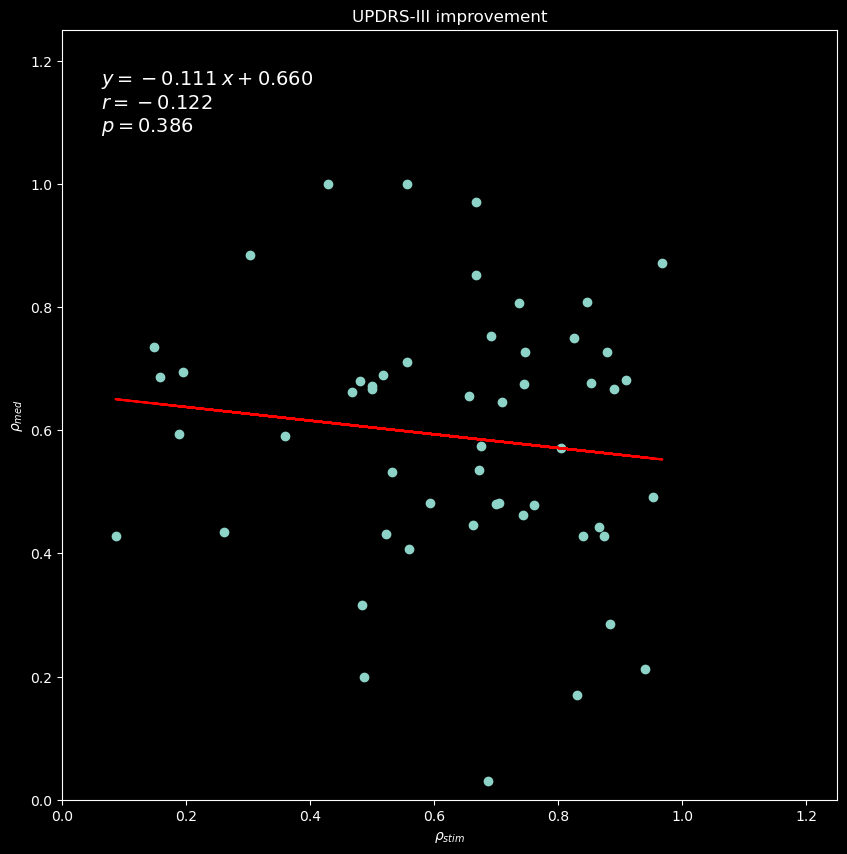

In [23]:
# Plot the data and fit like Zaidel et. al Figure 3C
lr_rho_med = linregress(dbs_off_meds_improvement,pre_dbs_meds_improvement)
plt.scatter(dbs_off_meds_improvement,pre_dbs_meds_improvement)
plt.plot(dbs_off_meds_improvement,dbs_off_meds_improvement*lr_rho_med.slope+lr_rho_med.intercept,'-r')
text = f"$y={lr_rho_med.slope:0.3f}\;x{lr_rho_med.intercept:+0.3f}$\n$r = {lr_rho_med.rvalue:0.3f}$\n$p = {lr_rho_med.pvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel(r'$\rho_{stim}$')
plt.ylabel(r'$\rho_{med}$')
plt.ylim([0,1.25])
plt.xlim([0,1.25])
plt.title('UPDRS-III improvement')
plt.style.use('dark_background')
plt.show;

Lin et. al also defines a postoperative measure where all scores are collected after the DBS surgery:

$$ \rho_{post} = \frac{u_{post,\,off\,med,\,stim\,off}-u_{post,\,stim\,on,\,off\,med}}{u_{post,\,off\,med,\,stim\,off}}$$

Where $\rho_{post}$ is `postop_improvement`, $u_{post,\,off\,med,\,stim\,off}$ is `df_post_dbs_off_meds_off_stim` and $u_{post,\,on\,stim,\,off\,med}$ is `df_post_dbs_off_meds_on_stim`

The preoperative measure is equivalent to $\rho_{med}$.

In [19]:
# Find cases that have preoperative and postoperative data
postop_cases = []
for ids in np.arange(0,df_post_dbs_off_meds_off_stim.__len__()):
    if ~np.isnan(df_post_dbs_off_meds_off_stim[ids]) and ~np.isnan(df_post_dbs_off_meds_on_stim[ids]): 
            postop_cases.append(ids)

postop_improvement = (df_post_dbs_off_meds_off_stim[postop_cases]-df_post_dbs_off_meds_on_stim[postop_cases])/df_post_dbs_off_meds_off_stim[postop_cases]
preop_improvement = (df_pre_dbs_off_meds[postop_cases]-df_pre_dbs_on_meds[postop_cases])/df_pre_dbs_off_meds[postop_cases]
lr_prepost = linregress(preop_improvement,postop_improvement)



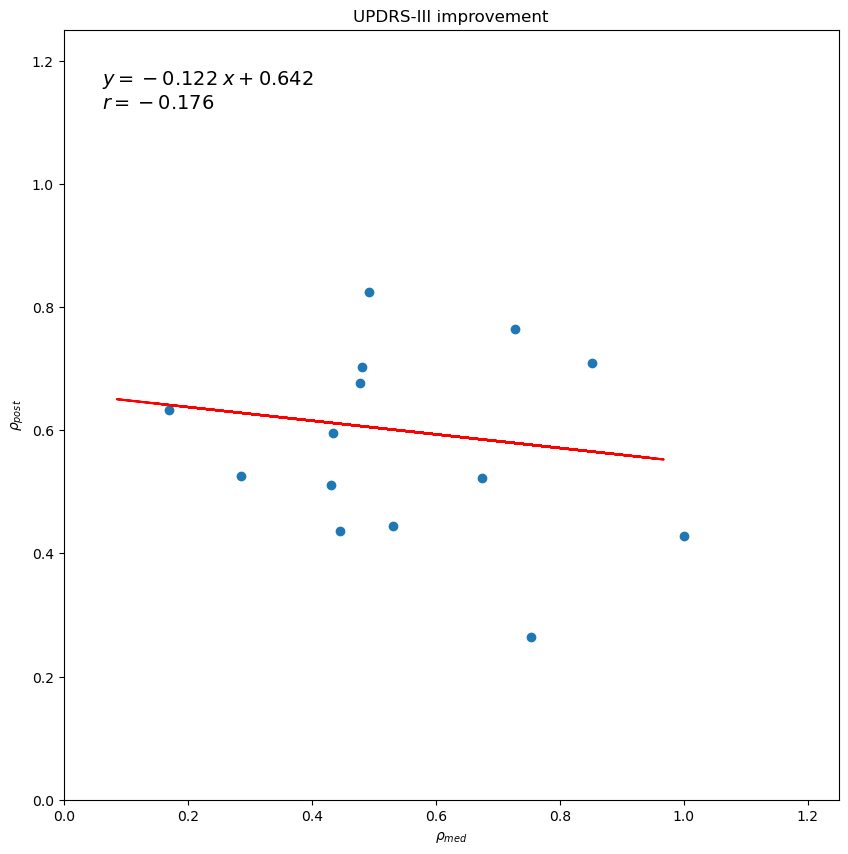

In [20]:
# Plot the data and fit like Lin et. al Figure 1B
plt.scatter(preop_improvement,postop_improvement)
plt.plot(dbs_off_meds_improvement,dbs_off_meds_improvement*lr_rho_med.slope+lr_rho_med.intercept,'-r')
text = f"$y={lr_prepost.slope:0.3f}\;x{lr_prepost.intercept:+0.3f}$\n$r = {lr_prepost.rvalue:0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.rcParams["figure.figsize"] = (10,10)
plt.ylim([0,1.25])
plt.xlim([0,1.25])
plt.xlabel(r'$\rho_{med}$')
plt.ylabel(r'$\rho_{post}$')
plt.title('UPDRS-III improvement')
plt.show;

<b>References</b>
$$$$
A. Zaidel, H. Bergman, Y. Ritovand Z. I. Md, “Levodopa and subthalamic deep brain stimulation responses are not congruent”, Movement Disorders, vol. 25, no. 14, pp. 2379–2386, 2010, doi: 10.1002/mds.23294. 
$$$$
W. Zhao, “Relationship Between Iron Distribution in Deep Gray Matter Nuclei Measured by Quantitative Susceptibility Mapping and Motor Outcome After Deep Brain Stimulation in Patients With Parkinson's Disease”, Journal of Magnetic Resonance Imaging, 2023, doi: 10.1002/jmri.28574.
$$$$
Liu Y, Xiao B, Zhang C, et al. Predicting Motor Outcome of Subthalamic Nucleus Deep Brain Stimulation for Parkinson's Disease Using Quantitative Susceptibility Mapping and Radiomics: A Pilot Study. Front Neurosci. 2021;15:731109. Published 2021 Sep 7. doi:10.3389/fnins.2021.731109
$$$$
Lin Z, Zhang X, Wang L, Zhang Y, Zhou H, Sun Q, Sun B, Huang P, Li D. Revisiting the L-Dopa Response as a Predictor of Motor Outcomes After Deep Brain Stimulation in Parkinson's Disease. Front Hum Neurosci. 2021 Feb 4;15:604433. doi: 10.3389/fnhum.2021.604433. PMID: 33613209; PMCID: PMC7889513.